In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd /content/drive/MyDrive/hifuku
!pip install -r requirements.txt

/content/drive/MyDrive/hifuku


In [17]:
import numpy as np
import pandas as pd
# from requests import head
import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob

import csv
import os.path
from pathlib import Path
import random
import math
import warnings
warnings.simplefilter('ignore')

import cv2
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
from PIL import Image
# from PIL import ImageOps

import joblib
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy import stats
# import statsmodels.api as sa
# import scikit_posthocs as sp
import ast
# from pandas_profiling import ProfileReport
from scipy.spatial import distance
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

from shapely.geometry import Polygon
from tqdm import tqdm

import hifuku

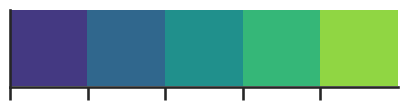

In [18]:
palette = sns.color_palette('viridis', n_colors=5)
sns.set(context='talk', style='ticks', palette=palette, font_scale=.7,rc={
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': [4.0, 4.0],
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.frameon': True,
    'legend.handletextpad': 0.5,
    'legend.loc': 'upper right',
    'legend.loc': 'best',
    'legend.title_fontsize': None,
})

sns.palplot(palette)
colors = [(int(color[0]*255), int(color[1]*255), int(color[2]*255)) for color in palette]

# Set parameters

In [84]:
root = '/content/drive/MyDrive/hifuku'

# a sample WSI image
# is_wsi = True
# path = f'{root}/data/sample_wsi_scale_0273.jpg'
# scale = 0.2730 # µm / pixel


# you may select a non-wsi sample image
is_wsi = False
path = f'{root}/data/sample_scale_02325.jpg'
scale = 0.2325 # µm / pixel


image_id = os.path.splitext(os.path.splitext(os.path.basename(path))[0])[0]
save_dir= f'{root}/results/{image_id}'
image_id

'sample_scale_02325'

# Run Hifuku

In [85]:
hifuku.main(root, path, is_wsi=is_wsi, scale=scale)

Output hidden; open in https://colab.research.google.com to view.

# See results

In [86]:
df_nerve = pd.read_csv(f'{root}/results/{image_id}/data_nerve.csv', index_col=0)
df_nerve

,id,is_wsi,x_px,y_px,scale,total_fas,n_fibers,total_area,total_density,std_density
0,sample_scale_02325,False,1200,1920,0.2325,1,814,0.120363,6762.875766,NaN


In [87]:
df_fas = pd.read_csv(f'{root}/results/{image_id}/data_fas.csv', index_col=0)
df_fas

,n_fas,n_fib,area,density
0,0,814,0.120363,6762.875766


In [88]:
df_fib = pd.read_csv(f'{root}/results/{image_id}/data_fib.csv', index_col=0)
df_fib = df_fib.rename(columns={'diameter_out': 'diameter'})
df_fib

,area_out,area_in,perimeter,circularity,convexity,solidity,eccentricity,major_axis_length,minor_axis_length,angle,diameter,diameter_in,thickness,g_ratio,n_fas,xmin,ymin,xmax,ymax
0,79.806485,23.615013,841.612259,0.654814,0.879509,0.935791,1.802223,13.648353,7.573067,172.549591,10.080316,5.483390,2.298463,0.543970,0.0,85.853659,101.379310,128.780488,163.172414
1,12.865388,4.021785,333.421353,0.672574,0.920496,0.925638,2.033728,6.024289,2.962189,107.017593,4.047310,2.262895,0.892207,0.559111,0.0,138.536585,52.137931,165.853659,73.379310
2,15.593066,3.675825,339.178713,0.787732,0.929319,0.963460,1.107401,4.747652,4.287202,63.424507,4.455750,2.163378,1.146186,0.485525,0.0,114.146341,43.448276,142.439024,68.551724
3,79.922166,27.921134,758.055910,0.808293,0.920828,0.983124,1.183848,11.066460,9.347872,11.060816,10.087619,5.962407,2.062606,0.591062,0.0,166.829268,28.965517,211.707317,84.000000
4,20.520834,5.871590,400.090400,0.745045,0.935614,0.968517,1.587238,6.533727,4.116412,39.498955,5.111549,2.734217,1.188666,0.534910,0.0,124.878049,126.482759,153.170732,158.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2.493074,1.276809,134.083260,0.805917,0.957602,0.968501,1.643761,2.312063,1.406569,3.260403,1.781651,1.275023,0.253314,0.715641,0.0,1778.536585,1169.241379,1797.073171,1190.482759
810,13.397301,1.262754,347.764499,0.643800,0.917003,0.937084,2.290776,6.361964,2.777209,86.292519,4.130130,1.267986,1.431072,0.307009,0.0,1818.536585,1127.724138,1849.756098,1148.000000
811,6.536482,NaN,384.735062,0.256640,0.615318,0.709791,1.056608,3.354210,3.174508,16.627972,2.884876,NaN,NaN,NaN,0.0,412.682927,1177.931034,436.097561,1201.103448
812,14.492481,2.320094,351.806129,0.680518,0.888302,0.933236,1.109394,4.582700,4.130813,20.311794,4.295626,1.718731,1.288447,0.400112,0.0,1029.268293,1171.172414,1052.682927,1198.206897


(-0.5, 1919.5, 1199.5, -0.5)

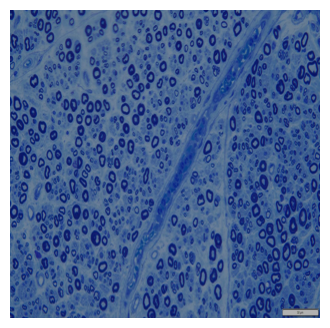

In [89]:
img = Image.open(f'{save_dir}/masked_fascicles.jpg')
plt.imshow(img, aspect='auto')
plt.axis('off')

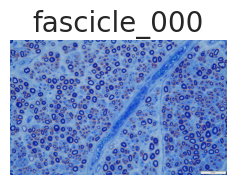

In [90]:
col = 4
row = len(df_fas)//col + 1
plt.figure(figsize=(col*3, row*3))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for num in range(len(df_fas)):
    plt.subplot(row, col, num+1)
    img = Image.open(f'{save_dir}/fascicles/fascicle_{num:03}_bbox.jpg')
    plt.imshow(img)
    plt.title(f'fascicle_{num:03}', fontsize=20)
    plt.axis('off')

# Exclude improperly detected fascicle(s), if present.

In [91]:
fas_to_remove = [] # fill number(s) of improperly detected fas in the list
df_fib_rm = df_fib[~df_fib['n_fas'].isin(fas_to_remove)].dropna(axis=0)
df_fib_rm

,area_out,area_in,perimeter,circularity,convexity,solidity,eccentricity,major_axis_length,minor_axis_length,angle,diameter,diameter_in,thickness,g_ratio,n_fas,xmin,ymin,xmax,ymax
0,79.806485,23.615013,841.612259,0.654814,0.879509,0.935791,1.802223,13.648353,7.573067,172.549591,10.080316,5.483390,2.298463,0.543970,0.0,85.853659,101.379310,128.780488,163.172414
1,12.865388,4.021785,333.421353,0.672574,0.920496,0.925638,2.033728,6.024289,2.962189,107.017593,4.047310,2.262895,0.892207,0.559111,0.0,138.536585,52.137931,165.853659,73.379310
2,15.593066,3.675825,339.178713,0.787732,0.929319,0.963460,1.107401,4.747652,4.287202,63.424507,4.455750,2.163378,1.146186,0.485525,0.0,114.146341,43.448276,142.439024,68.551724
3,79.922166,27.921134,758.055910,0.808293,0.920828,0.983124,1.183848,11.066460,9.347872,11.060816,10.087619,5.962407,2.062606,0.591062,0.0,166.829268,28.965517,211.707317,84.000000
4,20.520834,5.871590,400.090400,0.745045,0.935614,0.968517,1.587238,6.533727,4.116412,39.498955,5.111549,2.734217,1.188666,0.534910,0.0,124.878049,126.482759,153.170732,158.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,13.395139,4.529914,321.906635,0.751262,0.921697,0.936366,1.215239,4.667764,3.841024,137.817902,4.129797,2.401596,0.864100,0.581529,0.0,1810.731707,1031.172414,1836.097561,1056.275862
809,2.493074,1.276809,134.083260,0.805917,0.957602,0.968501,1.643761,2.312063,1.406569,3.260403,1.781651,1.275023,0.253314,0.715641,0.0,1778.536585,1169.241379,1797.073171,1190.482759
810,13.397301,1.262754,347.764499,0.643800,0.917003,0.937084,2.290776,6.361964,2.777209,86.292519,4.130130,1.267986,1.431072,0.307009,0.0,1818.536585,1127.724138,1849.756098,1148.000000
812,14.492481,2.320094,351.806129,0.680518,0.888302,0.933236,1.109394,4.582700,4.130813,20.311794,4.295626,1.718731,1.288447,0.400112,0.0,1029.268293,1171.172414,1052.682927,1198.206897


In [92]:
len(df_fib_rm[df_fib_rm['diameter'] >= 25]), df_fib_rm.isna().sum().sum()

(0, 0)

In [93]:
df_fas_rm = df_fas[~df_fas['n_fas'].isin(fas_to_remove)]
df_fas_rm

,n_fas,n_fib,area,density
0,0,814,0.120363,6762.875766


In [94]:
df_nerve_rm = df_nerve.copy()
df_nerve_rm['total_fas'] = len(df_fas_rm)
df_nerve_rm['n_fibers'] = df_fas_rm['n_fib'].sum()
df_nerve_rm['total_area'] = df_fas_rm['area'].sum()
df_nerve_rm['total_density'] = df_nerve_rm['n_fibers'] / df_nerve_rm['total_area']
df_nerve_rm['std_density'] = df_fas_rm['density'].std()
df_nerve_rm

,id,is_wsi,x_px,y_px,scale,total_fas,n_fibers,total_area,total_density,std_density
0,sample_scale_02325,False,1200,1920,0.2325,1,814,0.120363,6762.875766,NaN


# Visualize results

In [95]:
def get_density(df, area, name, xlim=20, dev=1):
    idx = []
    density = []
    bins = int(xlim // dev) + 1
    for i in range(bins):
        if i == bins - 1:
            dens = len(df[df[name] >= (i) * dev]) / area
        else:
            dens = len(df[ (df[name] >= (i) * dev) & (df[name] < (i + 1) * dev) ]) / area
        idx.append(i * dev)
        density.append(dens)
    density_df = pd.DataFrame({name: density}, index = idx)
    return density_df

def draw_histogram(df, total_area, name='diameter', dev=1.0, width=1, xlim=20, tick=1):
    density = get_density(df, total_area, name=name, xlim=xlim, dev=dev)
    fig, ax = plt.subplots(figsize=(6, 3))

    # ax.set_title(name)
    ax.set_xlim(0, xlim)
    ax.set_xlabel(f'{name} [um]', fontsize=10)
    ax.set_ylabel('Density [/mm2]', fontsize=10)
    ax.set_xticks(np.arange(0, xlim, tick))
    ax.set_xticks(np.arange(0, xlim, dev), minor=True)


    ax.bar(density.index, density[name], width=width, color='teal')
    # ax.bar(density_ref.index+width/2, density_ref[name], width=width, alpha=0.5, color='powderblue')
    # ax.legend(['sample', 'normal 57 y.o. male'])
    plt.savefig(f'{save_dir}/histogram_{name}.jpg')

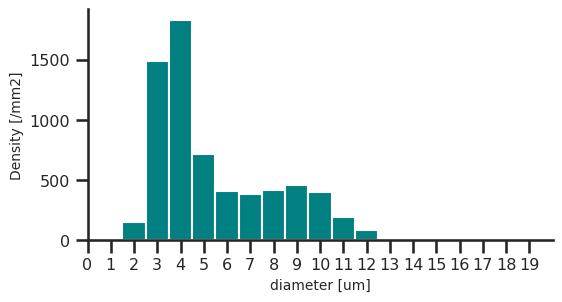

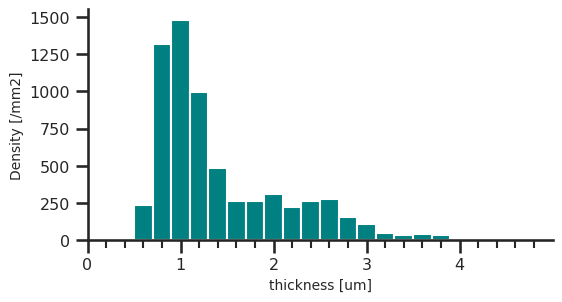

In [96]:
area = df_nerve_rm['total_area'][0]
draw_histogram(df_fib_rm, area, name='diameter', dev=1, width=1, xlim=20, tick=1)
draw_histogram(df_fib_rm, area, name='thickness', dev=0.20, width=0.20, xlim=5, tick=1)

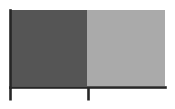

In [97]:
palette = sns.color_palette('gray', n_colors=2)
sns.set(context='talk', style='ticks', palette=palette, font_scale=.7,rc={
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': [4.0, 4.0],
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.frameon': True,
    'legend.handletextpad': 0.5,
    'legend.loc': 'upper right',
    'legend.loc': 'best',
    'legend.title_fontsize': None,
})
sns.palplot(palette)

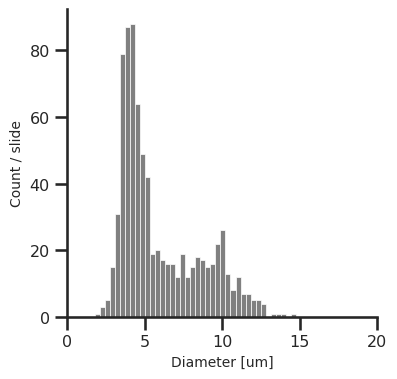

In [98]:
sns.histplot(df_fib_rm['diameter'], bins=40)
plt.xlim(0, 20)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_diameter.jpg')

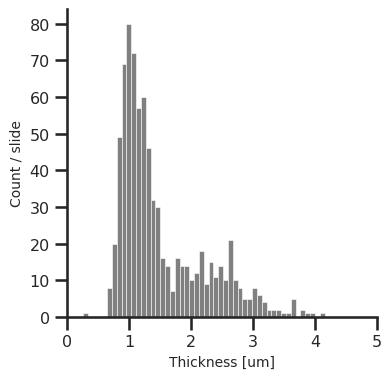

In [99]:
sns.histplot(df_fib_rm['thickness'], bins=50)
plt.xlim(0, 5)
plt.xlabel('Thickness [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_thickness.jpg')

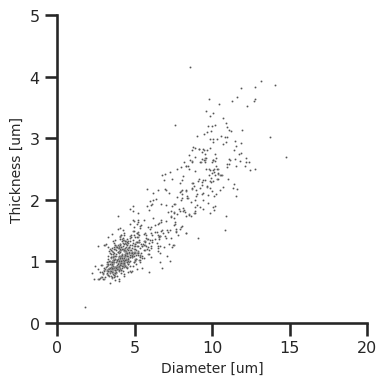

In [100]:
sns.scatterplot(data=df_fib_rm, x='diameter', y='thickness', s=2)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Thickness [um]', fontsize=10)
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.savefig(f'{save_dir}/scatter_diameter_thickness.jpg')

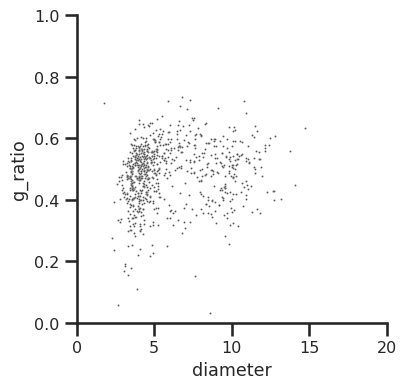

In [101]:
sns.scatterplot(data=df_fib_rm, x='diameter', y='g_ratio', s=2)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.savefig(f'{save_dir}/scatter_diameter_g_ratio.jpg')

# Classify large and small fibers with Gaussian Mixture model

In [102]:
gmm = GaussianMixture(n_components=2, covariance_type='tied')
loaded_gmm = joblib.load(f'{root}/weights/gmm_classifier.pkl')
df_fib_rm['gmm'] = loaded_gmm.predict(df_fib_rm[['diameter', 'thickness']])


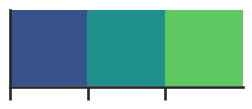

In [103]:
palette = sns.color_palette('viridis', n_colors=3)
sns.set(context='talk', style='ticks', palette=palette, font_scale=.7,rc={
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': [4.0, 4.0],
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.frameon': True,
    'legend.handletextpad': 0.5,
    'legend.loc': 'upper right',
    'legend.loc': 'best',
    'legend.title_fontsize': None,
})

sns.palplot(palette)

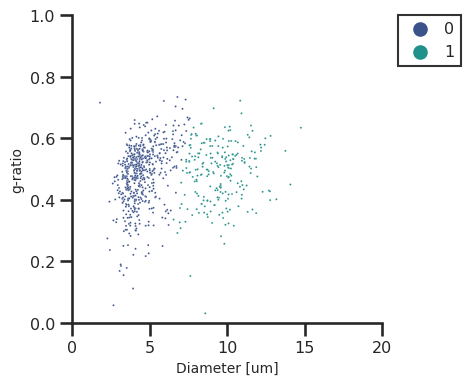

In [104]:
sns.scatterplot(data=df_fib_rm, x='diameter', y='g_ratio', hue='gmm', s=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('g-ratio', fontsize=10)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.savefig(f'{save_dir}/scatter_diameter_g_ratio_gmm.jpg')

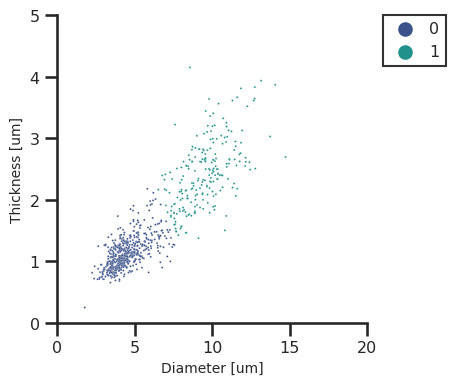

In [105]:
sns.scatterplot(data=df_fib_rm, x='diameter', y='thickness', hue='gmm', s=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Thickness [um]', fontsize=10)
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.savefig(f'{save_dir}/scatter_diameter_thickness_gmm.jpg')


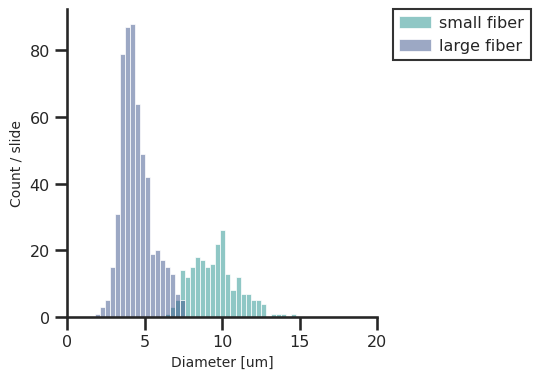

In [106]:
sns.histplot(data=df_fib_rm, x='diameter', bins=40, hue='gmm')
labels = ['small fiber', 'large fiber']
plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 20)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_diameter_gmm.jpg')

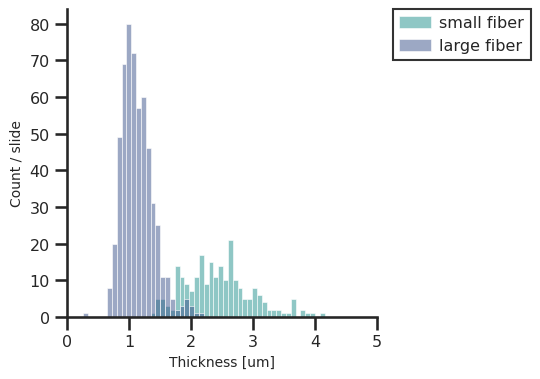

In [107]:
sns.histplot(data=df_fib_rm, x='thickness', bins=50, hue='gmm')
labels = ['small fiber', 'large fiber']
plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 5)
plt.xlabel('Thickness [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_thickness_gmm.jpg')

# Calculate linear regression

In [108]:
def get_linear_regression(df, xlabel='diameter', ylabel='g_ratio'):
    df = df.copy().dropna(subset=(xlabel, ylabel))
    x = df[xlabel].values.reshape(-1, 1)
    y = df[ylabel]
    lr = LinearRegression()
    lr.fit(x, y)
    # r2 = lr.score(x, y)
    coef = lr.coef_
    intercept = lr.intercept_


    sns.jointplot(data=df_fib_rm, x='diameter', xlim=(0, 15), ylim=(0, 1), y='g_ratio', hue='gmm', s=2)
    plt.legend([],[], frameon=False)

    x_ = np.arange(min(df[xlabel]), max(df[xlabel]), 0.1)
    plt.plot(x_, coef*x_+intercept, color='gray', linewidth=2)



    plt.xlim(0, 20)
    plt.ylim(0, 1)
    plt.xlabel('Diameter [um]', fontsize=10)
    plt.ylabel('g-ratio', fontsize=10)

    plt.savefig(f'{save_dir}/{xlabel}_{ylabel}_lr.jpg')
    print(
        f'coef:{coef[0]:.4f}, intercept:{intercept:.3f}'
    )
    return coef[0], intercept

coef:0.0056, intercept:0.453


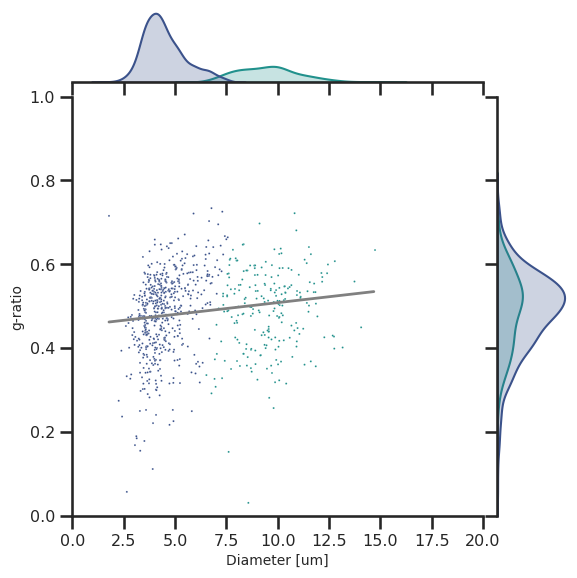

In [109]:
df_nerve['coef'], df_nerve['intercept'] = get_linear_regression(df_fib_rm)

In [110]:
df_fib

,area_out,area_in,perimeter,circularity,convexity,solidity,eccentricity,major_axis_length,minor_axis_length,angle,diameter,diameter_in,thickness,g_ratio,n_fas,xmin,ymin,xmax,ymax
0,79.806485,23.615013,841.612259,0.654814,0.879509,0.935791,1.802223,13.648353,7.573067,172.549591,10.080316,5.483390,2.298463,0.543970,0.0,85.853659,101.379310,128.780488,163.172414
1,12.865388,4.021785,333.421353,0.672574,0.920496,0.925638,2.033728,6.024289,2.962189,107.017593,4.047310,2.262895,0.892207,0.559111,0.0,138.536585,52.137931,165.853659,73.379310
2,15.593066,3.675825,339.178713,0.787732,0.929319,0.963460,1.107401,4.747652,4.287202,63.424507,4.455750,2.163378,1.146186,0.485525,0.0,114.146341,43.448276,142.439024,68.551724
3,79.922166,27.921134,758.055910,0.808293,0.920828,0.983124,1.183848,11.066460,9.347872,11.060816,10.087619,5.962407,2.062606,0.591062,0.0,166.829268,28.965517,211.707317,84.000000
4,20.520834,5.871590,400.090400,0.745045,0.935614,0.968517,1.587238,6.533727,4.116412,39.498955,5.111549,2.734217,1.188666,0.534910,0.0,124.878049,126.482759,153.170732,158.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2.493074,1.276809,134.083260,0.805917,0.957602,0.968501,1.643761,2.312063,1.406569,3.260403,1.781651,1.275023,0.253314,0.715641,0.0,1778.536585,1169.241379,1797.073171,1190.482759
810,13.397301,1.262754,347.764499,0.643800,0.917003,0.937084,2.290776,6.361964,2.777209,86.292519,4.130130,1.267986,1.431072,0.307009,0.0,1818.536585,1127.724138,1849.756098,1148.000000
811,6.536482,NaN,384.735062,0.256640,0.615318,0.709791,1.056608,3.354210,3.174508,16.627972,2.884876,NaN,NaN,NaN,0.0,412.682927,1177.931034,436.097561,1201.103448
812,14.492481,2.320094,351.806129,0.680518,0.888302,0.933236,1.109394,4.582700,4.130813,20.311794,4.295626,1.718731,1.288447,0.400112,0.0,1029.268293,1171.172414,1052.682927,1198.206897


# Spatial analysis

Mean Nearest Neighbor Distance: 7.39 um
Entropy: 9.94


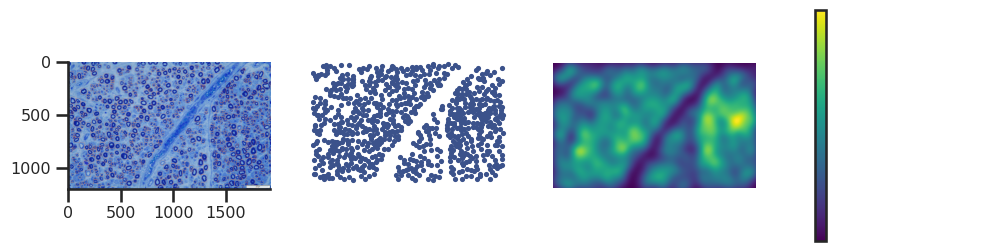

In [111]:
# down scale to 1/10 to compute fast
df_fib['x'] = (df_fib['xmin'] + df_fib['xmax']) / 20
df_fib['y'] = (df_fib['ymin'] + df_fib['ymax']) / 20

df_fas_rm['NND'] = np.nan
df_fas_rm['KDE_entropy'] = np.nan
for idx in range(len(df_fas_rm)):
    data = df_fib[(df_fib['n_fas']==idx)].dropna(subset=['x', 'y'])
    data = data[['x', 'y']]
    x = data['x']
    y = data['y']
    if len(data) < 10:
        continue

    # Calculate nearest neighbor distances
    distances = distance.cdist(data, data)
    nnd = np.min(np.ma.masked_array(distances, mask=np.eye(len(data))), axis=1)
    # Find the minimum distance for each point
    masked_distances = np.ma.masked_array(distances, mask=np.eye(len(data)))
    nearest_distances = masked_distances.min(axis=1)
    # Calculate the mean nearest neighbor distance
    mean_nnd = nearest_distances.mean() * 10 * scale # um
    df_fas_rm['NND'][idx] =  mean_nnd
    print(f"Mean Nearest Neighbor Distance: {mean_nnd:.2f} um")


    # Perform kernel density estimation
    bandwidth = 5  # note that 1/10 scale to original pixcel
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)

    # Evaluate the KDE on the grid
    grid_x, grid_y = np.mgrid[0:x.max():1, 0:y.max():1]
    grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    log_density = kde.score_samples(grid_points)
    density = np.exp(log_density)

    # Calculate the entropy of the KDE distribution
    entropy_value = entropy(density)
    df_fas_rm['KDE_entropy'][idx] =  entropy_value
    print(f"Entropy: {entropy_value:.2f}")

    # plot data
    fig, ax = plt.subplots(1, 4, figsize=(12, 3))
    img = Image.open(f'{save_dir}/fascicles/fascicle_{idx:03}_bbox.jpg')
    ax[0].imshow(img)
    ax[1].set_aspect('equal')

    ax[1].scatter(x, y, s=5)
    ax[1].set_xlim(0, x.max()+10)
    ax[1].set_ylim(0, y.max()+10)
    ax[1].invert_yaxis()
    ax[1].axis('off')
    ax[1].set_aspect('equal')

    im = ax[2].imshow(density.reshape(grid_x.shape).T, origin='lower', cmap='viridis')
    ax[2].invert_yaxis()
    ax[2].axis('off')
    ax[2].set_aspect('equal')

    # colorbar
    cbar = fig.colorbar(im, ax=ax[3], pad=0.05, location='left')
    cbar.set_ticks([])
    ax[3].axis('off')
    plt.savefig(f'{save_dir}/fascicles/fascicle_{idx:03}_kde.jpg')
    # plt.close()

df_fas_rm['expected_nnd'] = 1 / (2 * np.sqrt(df_fas_rm['n_fib'] / (df_fas_rm['area'] * 1000000))) # um
# Calculate the ratio of observed mean nearest neighbor distance to expected value
df_fas_rm['NNI'] = df_fas_rm['NND'] / df_fas_rm['expected_nnd']


In [112]:
df_fas_rm

,n_fas,n_fib,area,density,NND,KDE_entropy,expected_nnd,NNI
0,0,814,0.120363,6762.875766,7.394122,9.937458,6.08001,1.216136


In [113]:
df_nerve_rm

,id,is_wsi,x_px,y_px,scale,total_fas,n_fibers,total_area,total_density,std_density
0,sample_scale_02325,False,1200,1920,0.2325,1,814,0.120363,6762.875766,NaN


In [114]:
df_nerve_rm.to_csv(f'{save_dir}/df_nerve_rm.csv')
df_fas_rm.to_csv(f'{save_dir}/df_fas_rm.csv')
df_fib_rm.to_csv(f'{save_dir}/df_fib_rm.csv')

In [115]:
# from google.colab import runtime
# runtime.unassign()